In [1]:
######################## PCA ############################
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
# 导入数据集
digits = load_digits()
train = digits.data
target = digits.target
x_train,x_test,y_train,y_true = train_test_split(train,target,test_size=0.2,random_state=33)

In [3]:
# 去均值和方差归一化 
ss = StandardScaler()   
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [4]:
#对未降维的数据进行分类
svc = SVC(kernel='rbf') #使用支持向量机进行分类，核函数采用径向基核函数
svc.fit(x_train,y_train)
y_predict = svc.predict(x_test)
print("The Accuraracy of SVC is:",svc.score(x_test,y_true))
print("classification report of SVC\n",classification_report(y_true,y_predict,target_names=digits.target_names.astype(str)))

The Accuraracy of SVC is: 0.9888888888888889
classification report of SVC
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.98      1.00      0.99        46
           2       1.00      0.97      0.99        37
           3       1.00      1.00      1.00        39
           4       0.96      1.00      0.98        25
           5       0.97      0.97      0.97        37
           6       0.98      1.00      0.99        41
           7       1.00      1.00      1.00        29
           8       1.00      0.98      0.99        44
           9       1.00      0.97      0.98        33

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



[0.9866480446927375, 0.9872036002482931, 0.9883147113594042, 0.988314711359404, 0.9877622594661701, 0.9877591558038485, 0.9883116076970826, 0.9883178150217257, 0.9877529484792055, 0.9877529484792055]


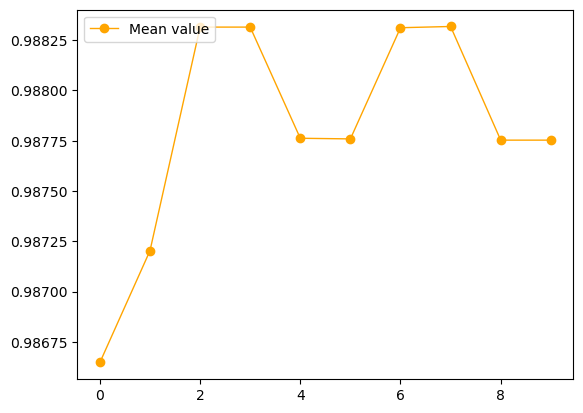

In [5]:
#十折交叉验证
epochs = 10
x = [i for i in range(10)]
scores = []
cv = KFold(n_splits=10,shuffle=True)    #定义10折交叉验证
for i in range(epochs):
    score = cross_val_score(svc, train, target, cv=cv).mean()  #降维前
    scores.append(score)
print(scores)   
plt.plot(x, scores, linewidth=1, color="orange", marker="o",label="Mean value")
plt.legend(["Mean value"],loc="upper left")#设置线条标识
plt.show()

In [9]:
#PCA降维，并对数据进行分类
pca = PCA(n_components=2,whiten=True)
pca.fit(x_train,y_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
svc = SVC(kernel='rbf')
svc.fit(x_train_pca,y_train)
y_pre_svc = svc.predict(x_test_pca)
print("The Accuraracy of PCA_SVC is:",svc.score(x_test_pca,y_true))
print("classification report of PCA_SVC\n",classification_report(y_true,y_pre_svc,target_names=digits.target_names.astype(str)))

The Accuraracy of PCA_SVC is: 0.5916666666666667
classification report of PCA_SVC
               precision    recall  f1-score   support

           0       0.72      0.79      0.75        29
           1       0.59      0.70      0.64        46
           2       0.72      0.57      0.64        37
           3       0.46      0.33      0.39        39
           4       0.88      0.84      0.86        25
           5       0.36      0.27      0.31        37
           6       0.93      0.93      0.93        41
           7       0.70      0.79      0.74        29
           8       0.41      0.34      0.37        44
           9       0.31      0.52      0.39        33

    accuracy                           0.59       360
   macro avg       0.61      0.61      0.60       360
weighted avg       0.60      0.59      0.59       360



[0.6627281191806331, 0.6560707635009311, 0.6588919925512104, 0.6600031036623215, 0.6605369335816262, 0.6588702669149596, 0.6583302296710117, 0.6577622594661702, 0.6588764742396027, 0.6616759776536313]


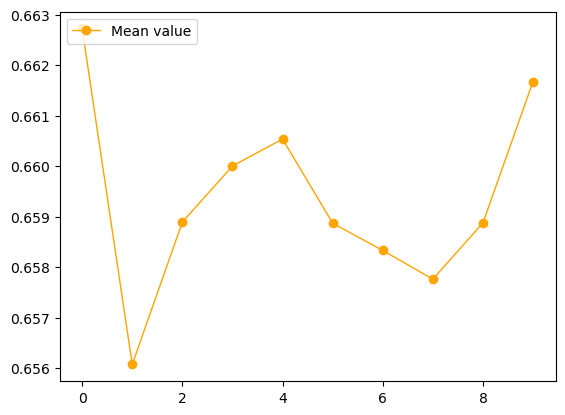

In [10]:
#十折交叉验证
epochs = 10
train_pca = pca.fit_transform(train)    #用train来训练PCA模型，同时返回降维后的数据
x = [i for i in range(10)]
scores = []
cv = KFold(n_splits=10,shuffle=True)    #定义10折交叉验证
for i in range(epochs):
    score = cross_val_score(svc, train_pca, target, cv=cv).mean()  #降维前
    scores.append(score)
print(scores)   
plt.plot(x, scores, linewidth=1, color="orange", marker="o",label="Mean value")
plt.legend(["Mean value"],loc="upper left")#设置线条标识
plt.show()

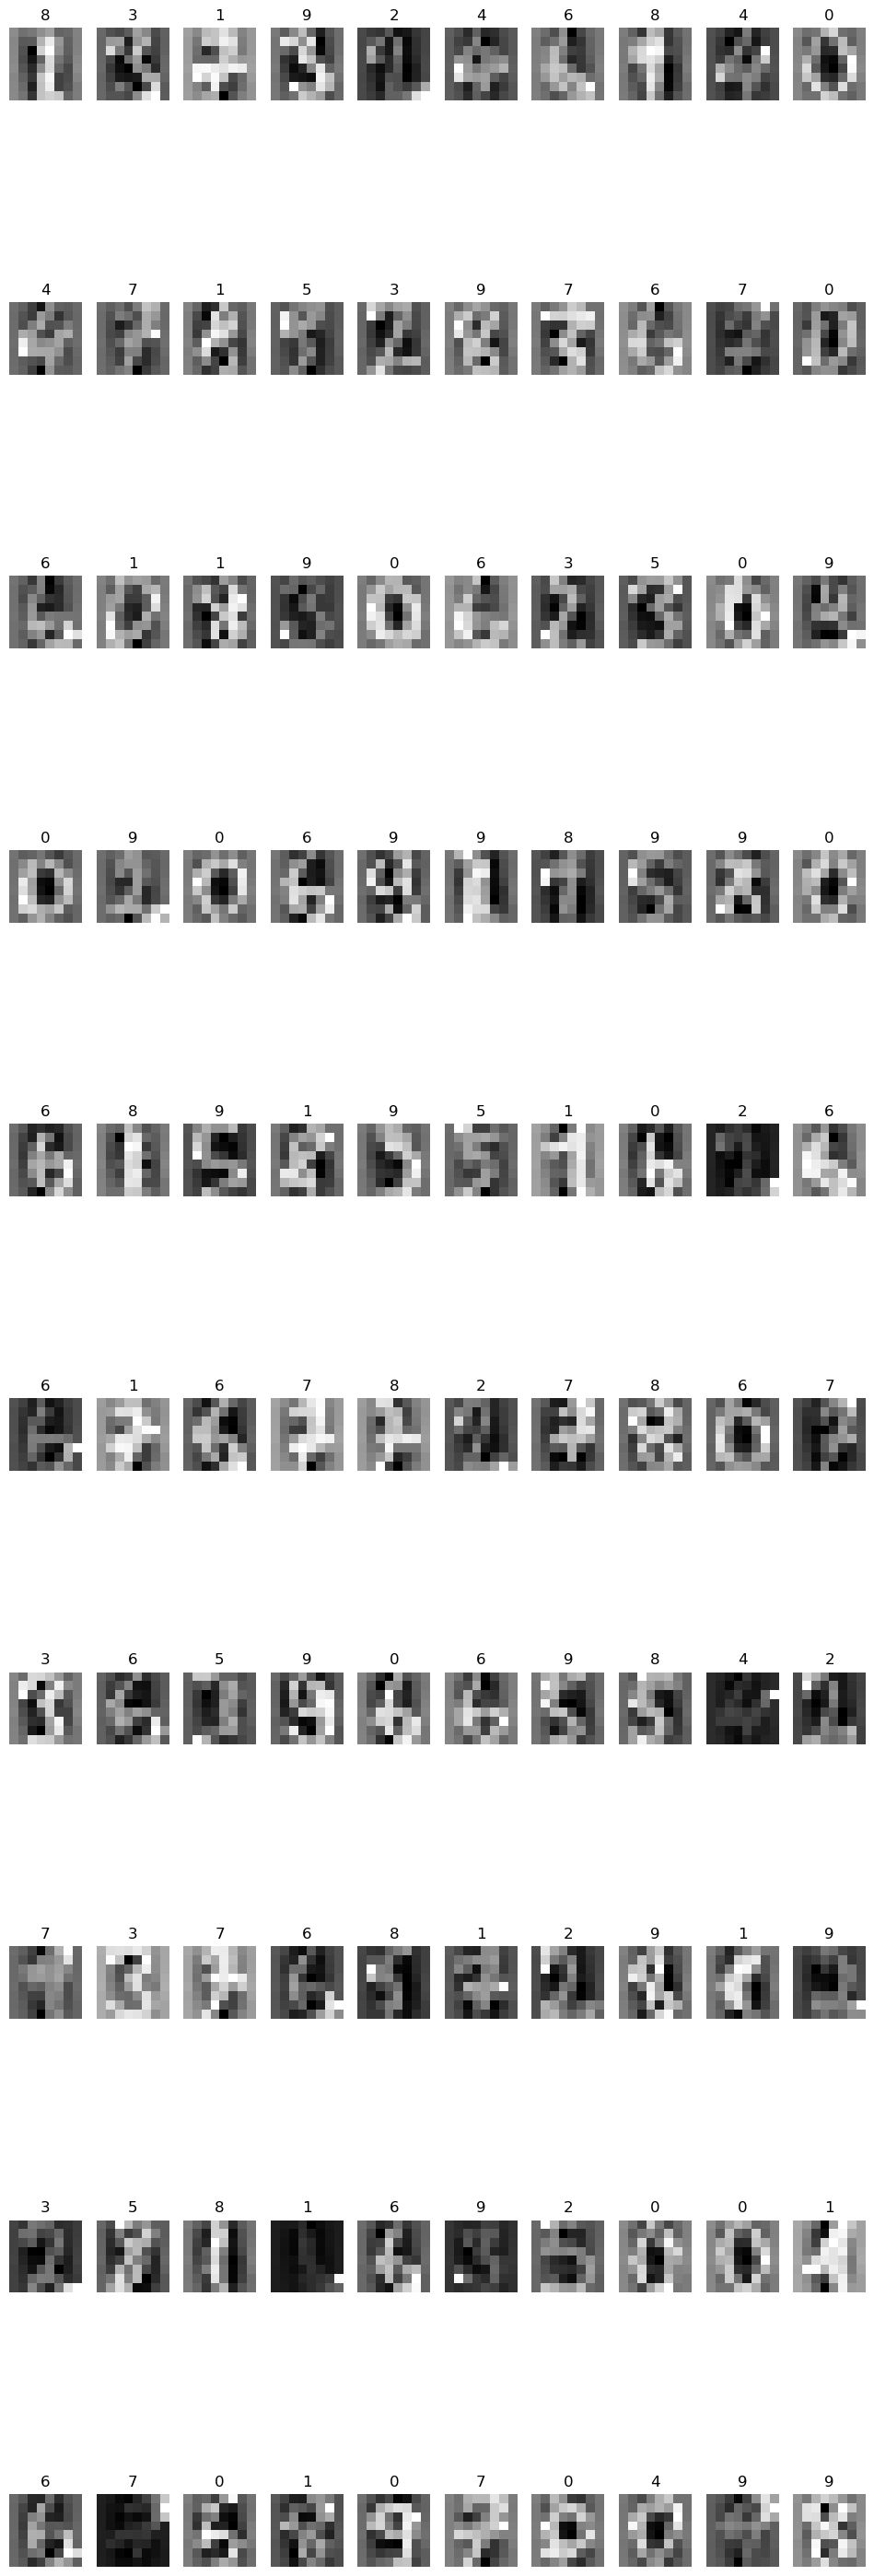

In [16]:
#绘图
samples = x_test[:100]  #取前100个数据
y_pre = y_pre_svc[:100]
plt.figure(figsize=(12,38)) #确定图形的大小
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(samples[i].reshape(8,8),cmap='gray')
    title = str(y_pre[i])
    plt.title(title)
    plt.axis('off')
plt.show()

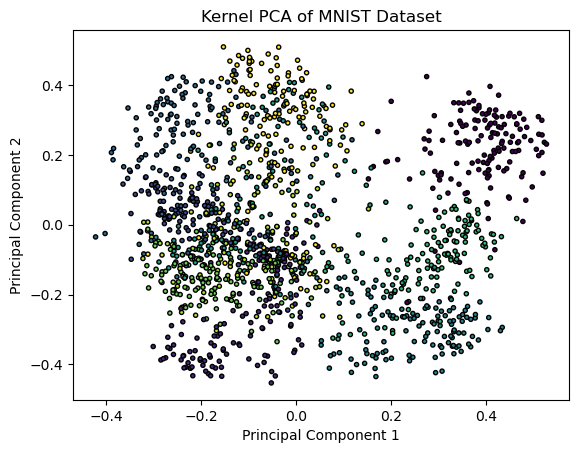

The Accuraracy of PCA_SVC is: 0.6111111111111112
classification report of PCA_SVC
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.56      0.76      0.65        46
           2       0.46      0.70      0.56        37
           3       0.82      0.59      0.69        39
           4       0.72      0.84      0.78        25
           5       0.24      0.11      0.15        37
           6       0.85      0.71      0.77        41
           7       0.56      0.83      0.67        29
           8       0.41      0.25      0.31        44
           9       0.59      0.61      0.60        33

    accuracy                           0.61       360
   macro avg       0.61      0.63      0.61       360
weighted avg       0.60      0.61      0.59       360

[0.10406890130353816, 0.10740533829919305, 0.10014587212911234, 0.11074487895716947, 0.10349782743637492, 0.10628801986343886, 0.10461204220980758, 0.10348851

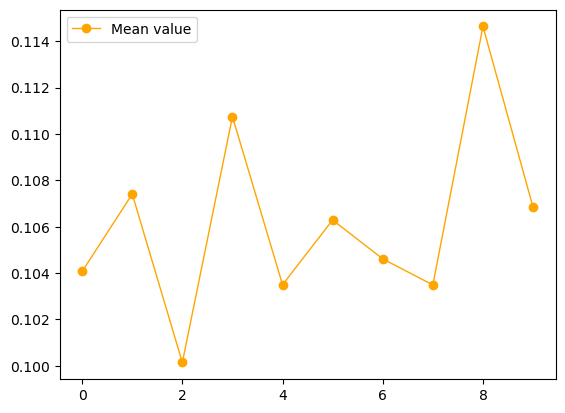

In [2]:
###################################### kernel PCA ############################################
import numpy as np
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
'''
# 加载MNIST数据集
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target.astype(int)
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 数据标准化
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
'''
# 导入数据集
digits = load_digits()
train = digits.data
target = digits.target
x_train,x_test,y_train,y_true = train_test_split(train,target,test_size=0.2,random_state=33)
# 去均值和方差归一化 
ss = StandardScaler()   
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

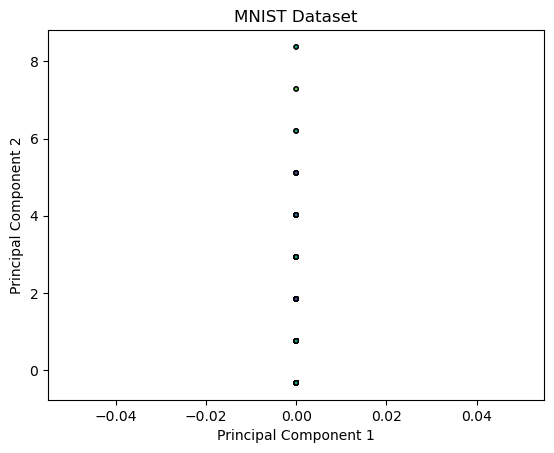

The Accuraracy of PCA_SVC is: 0.6111111111111112
classification report of PCA_SVC
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.56      0.76      0.65        46
           2       0.46      0.70      0.56        37
           3       0.82      0.59      0.69        39
           4       0.72      0.84      0.78        25
           5       0.24      0.11      0.15        37
           6       0.85      0.71      0.77        41
           7       0.56      0.83      0.67        29
           8       0.41      0.25      0.31        44
           9       0.59      0.61      0.60        33

    accuracy                           0.61       360
   macro avg       0.61      0.63      0.61       360
weighted avg       0.60      0.61      0.59       360



In [5]:
# 使用Kernel PCA进行降维
kpca = KernelPCA(n_components=2, kernel='rbf')
X_train_kpca = kpca.fit_transform(x_train)
X_test_kpca = kpca.transform(x_test)
# 可视化降维结果
plt.scatter(X_train_kpca[:, 0], X_train_kpca[:, 1], c=y_train, cmap='viridis', marker='.', edgecolor='k')
plt.title('MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
#分类
svc = SVC(kernel='rbf')
svc.fit(X_train_kpca,y_train)
y_pre_svc = svc.predict(X_test_kpca)
print("The Accuraracy of PCA_SVC is:",svc.score(X_test_kpca,y_true))
print("classification report of PCA_SVC\n",classification_report(y_true,y_pre_svc,target_names=digits.target_names.astype(str)))

In [2]:
########################### Autoencoder ###################################
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

C:\ProgramData\anaconda3\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] 找不到指定的程序。'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [30]:
# 定义自动编码器模型
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            #nn.ReLU(),
            #nn.Linear(32, 16)

        )
        self.decoder = nn.Sequential(
            #nn.Linear(16, 32),
            #nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [31]:
# 加载MNIST数据集
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

Epoch [1/20], Loss: 0.2650
Epoch [2/20], Loss: 0.2344
Epoch [3/20], Loss: 0.2525
Epoch [4/20], Loss: 0.2170
Epoch [5/20], Loss: 0.1883
Epoch [6/20], Loss: 0.1789
Epoch [7/20], Loss: 0.1733
Epoch [8/20], Loss: 0.1530
Epoch [9/20], Loss: 0.1496
Epoch [10/20], Loss: 0.1546
Epoch [11/20], Loss: 0.1506
Epoch [12/20], Loss: 0.1470
Epoch [13/20], Loss: 0.1433
Epoch [14/20], Loss: 0.1357
Epoch [15/20], Loss: 0.1453
Epoch [16/20], Loss: 0.1294
Epoch [17/20], Loss: 0.1379
Epoch [18/20], Loss: 0.1422
Epoch [19/20], Loss: 0.1425
Epoch [20/20], Loss: 0.1261


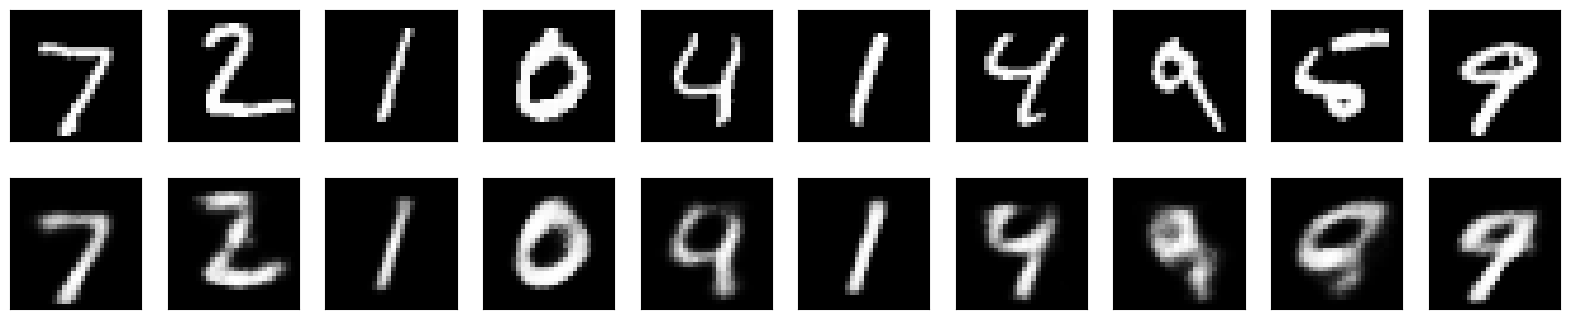

In [40]:
# 初始化模型、损失函数和优化器
model = Autoencoder()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# 训练自动编码器
num_epochs = 20
for epoch in range(num_epochs):
    for data in train_loader:
        inputs, _ = data
        '''
        with torch.no_grad():
            inputs = dmodel(inputs)
        '''
        outputs = model(inputs)

        optimizer.zero_grad()
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 使用训练好的自动编码器进行编码和解码
with torch.no_grad():
    for data in test_loader:
        inputs, _ = data
        outputs = model(inputs)
        break

# 可视化原始图像和重建图像
n = 10  # 选择要可视化的图像数量
plt.figure(figsize=(20, 4))
for i in range(n):
    # 显示原始图像
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(inputs[i].view(28, 28).numpy())
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 显示重建图像
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(outputs[i].view(28, 28).numpy())
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

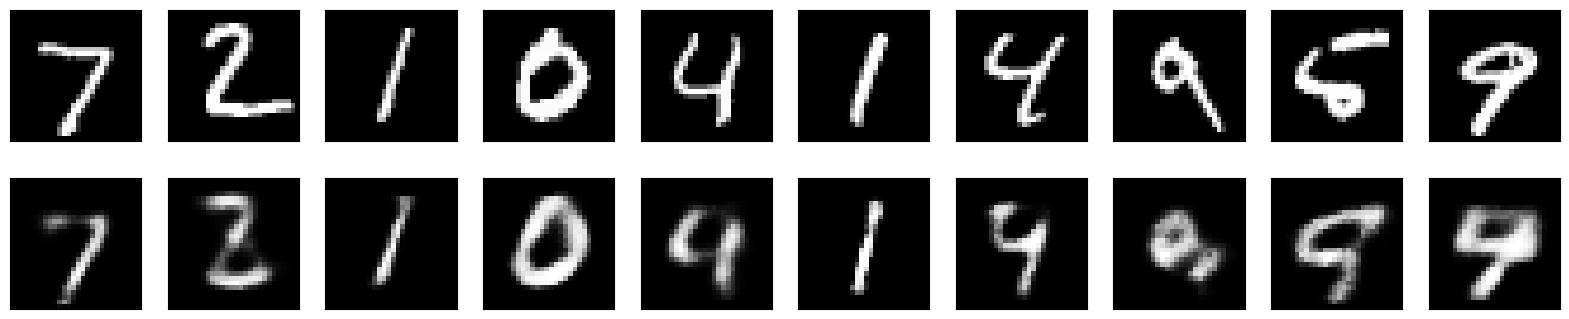

In [41]:
# 定义添加噪声的函数
def add_noise(inputs, noise_factor=0.5):
    noise = torch.randn_like(inputs) * noise_factor
    noisy_inputs = inputs + noise
    return noisy_inputs

# 使用训练好的自动编码器对加了噪声的图像进行编码和解码
with torch.no_grad():
    for data in test_loader:
        inputs, _ = data
        noisy_inputs = add_noise(inputs)
        outputs = model(noisy_inputs)
        ##作为特征提取输入（在特征提取网络训练内部添加with torch.no_grad():noisy_inputs = add_noise(inputs, noise_factor)，outputs = dmodel(noisy_inputs)）
        break

# 可视化原始图像、特征提取图像
n = 10  # 选择要可视化的图像数量
plt.figure(figsize=(20, 4))
for i in range(n):
    # 显示原始图像
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(inputs[i].view(28, 28).numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 显示重建图像
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(outputs[i].view(28, 28).numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [42]:
import numpy as np
val_1 = []
val_2 = []
val_3 = []
val_4 = []

for i in range (0, 10):
    for x_train, y_train in train_loader:
        for x_test, y_test in test_loader:
            #用原始图像的一个batch做测试
            x_test = np.array(x_test.numpy())
            y_test = y_test
            break
        # 转换为 NumPy 数组
        x_train = np.array(x_train.numpy())

        # 去均值和方差归一化 
        ss = StandardScaler()   
        x_train = ss.fit_transform(x_train)
        x_test = ss.transform(x_test)
        svc = SVC(kernel='rbf')
        svc.fit(x_train,y_train)
        y_pre_svc = svc.predict(x_test)
        #print("The Accuraracy of SVC is:",svc.score(x_test,y_test))
        val_1.append(svc.score(x_test,y_test))
        break

    #以一个batch为例
    for x_train, y_train in train_loader:
        for x_test, y_test in test_loader:
            #用原始图像的一个batch做测试
            x_test = np.array(x_test.numpy())
            y_test = y_test
            break
        with torch.no_grad():
            x_train = model(x_train)
        # 转换为 NumPy 数组
        x_train = np.array(x_train.numpy())

        # 去均值和方差归一化 
        ss = StandardScaler()   
        x_train = ss.fit_transform(x_train)
        x_test = ss.transform(x_test)
        svc = SVC(kernel='rbf')
        svc.fit(x_train,y_train)
        y_pre_svc = svc.predict(x_test)
        #print("The Accuraracy of LinearAnto_SVC is:",svc.score(x_test,y_test))
        val_2.append(svc.score(x_test,y_test))
        break

    for x_train, y_train in train_loader:
        for x_test, y_test in test_loader:
            #用原始图像的一个batch做测试
            x_test = np.array(x_test.numpy())
            y_test = y_test
            break
        with torch.no_grad():
            noisy_inputs = add_noise(x_train)
            x_train = model(noisy_inputs)

        # 转换为 NumPy 数组
        x_train = np.array(x_train.numpy())

        # 去均值和方差归一化 
        ss = StandardScaler()   
        x_train = ss.fit_transform(x_train)
        x_test = ss.transform(x_test)
        svc = SVC(kernel='rbf')
        svc.fit(x_train,y_train)
        y_pre_svc = svc.predict(x_test)
        #print("The Accuraracy of withnoise_LinearAnto_SVC is:",svc.score(x_test,y_test))
        val_3.append(svc.score(x_test,y_test))
        break

    for x_train, y_train in train_loader:
        for x_test, y_test in test_loader:
            #用原始图像的一个batch做测试
            x_test = np.array(x_test.numpy())
            y_test = y_test
            break
        x_train = add_noise(x_train)

        # 转换为 NumPy 数组
        x_train = np.array(x_train.numpy())

        # 去均值和方差归一化 
        ss = StandardScaler()   
        x_train = ss.fit_transform(x_train)
        x_test = ss.transform(x_test)
        svc = SVC(kernel='rbf')
        svc.fit(x_train,y_train)
        y_pre_svc = svc.predict(x_test)
        #print("The Accuraracy of withnoise_SVC is:",svc.score(x_test,y_test))
        val_4.append(svc.score(x_test,y_test))
        break

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31614 (\N{CJK UNIFIED IDEOGRAPH-7B7E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22235 (\N{CJK UNIFIED IDEOGRAPH-56DB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  fig.canvas.print_figure(bytes_

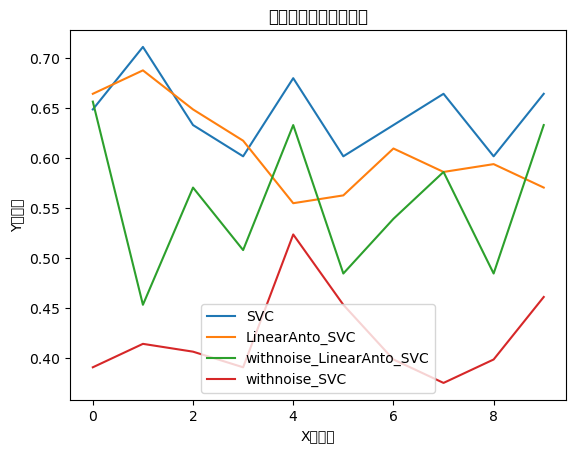

In [43]:
# 绘制折线图
plt.plot(val_1, label='SVC')
plt.plot(val_2, label='LinearAnto_SVC')
plt.plot(val_3, label='withnoise_LinearAnto_SVC')
plt.plot(val_4, label='withnoise_SVC')

# 添加标签和标题
plt.xlabel('X轴标签')
plt.ylabel('Y轴标签')
plt.title('四个列表数据的折线图')

# 添加图例
plt.legend()

# 显示图形
plt.show()

Epoch [1/20], Loss: 0.1809
Epoch [2/20], Loss: 0.1504
Epoch [3/20], Loss: 0.1443
Epoch [4/20], Loss: 0.1419
Epoch [5/20], Loss: 0.1372
Epoch [6/20], Loss: 0.1263
Epoch [7/20], Loss: 0.1216
Epoch [8/20], Loss: 0.1240
Epoch [9/20], Loss: 0.1167
Epoch [10/20], Loss: 0.1234
Epoch [11/20], Loss: 0.1212
Epoch [12/20], Loss: 0.1212
Epoch [13/20], Loss: 0.1179
Epoch [14/20], Loss: 0.1179
Epoch [15/20], Loss: 0.1173
Epoch [16/20], Loss: 0.1156
Epoch [17/20], Loss: 0.1195
Epoch [18/20], Loss: 0.1122
Epoch [19/20], Loss: 0.1128
Epoch [20/20], Loss: 0.1111


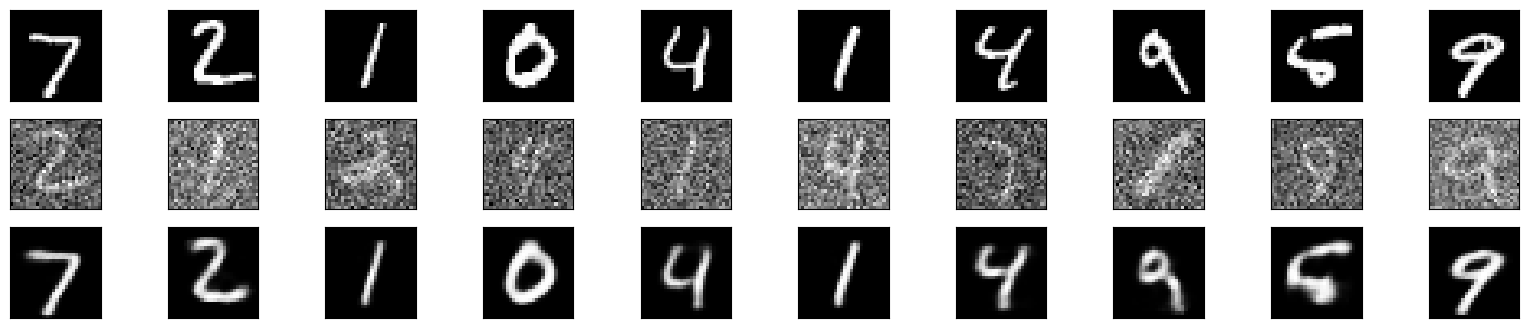

In [20]:
########### 降噪 ###########
# 定义降噪自动编码器模型
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 初始化降噪自动编码器模型、损失函数和优化器
dmodel = DenoisingAutoencoder()
criterion = nn.BCELoss()
optimizer = optim.Adam(dmodel.parameters(), lr=0.001)

# 训练降噪自动编码器
num_epochs = 20
noise_factor = 0.5
for epoch in range(num_epochs):
    for data in train_loader:
        inputs, _ = data
        noisy_inputs = add_noise(inputs, noise_factor)

        outputs = dmodel(noisy_inputs)

        optimizer.zero_grad()
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 使用训练好的降噪自动编码器进行编码和解码
with torch.no_grad():
    for data in test_loader:
        inputs, _ = data
        #noisy_inputs = add_noise(inputs, noise_factor)
        outputs = dmodel(inputs)
        ##作为特征提取输入（在特征提取网络训练内部添加with torch.no_grad():outputs = dmodel(inputs)）
        break

# 可视化原始图像、噪声图像和重建图像
n = 10  # 选择要可视化的图像数量
plt.figure(figsize=(20, 4))
for i in range(n):
    # 显示原始图像
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(inputs[i].view(28, 28).numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 显示噪声图像
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_inputs[i].view(28, 28).numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 显示重建图像
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(outputs[i].view(28, 28).numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Epoch [1/20], Loss: 0.2637
Epoch [2/20], Loss: 0.2594
Epoch [3/20], Loss: 0.2694
Epoch [4/20], Loss: 0.2623
Epoch [5/20], Loss: 0.2577
Epoch [6/20], Loss: 0.2505
Epoch [7/20], Loss: 0.2673
Epoch [8/20], Loss: 0.2512
Epoch [9/20], Loss: 0.2556
Epoch [10/20], Loss: 0.2648
Epoch [11/20], Loss: 0.2573
Epoch [12/20], Loss: 0.2596
Epoch [13/20], Loss: 0.2564
Epoch [14/20], Loss: 0.2557
Epoch [15/20], Loss: 0.2575
Epoch [16/20], Loss: 0.2593
Epoch [17/20], Loss: 0.2698
Epoch [18/20], Loss: 0.2537
Epoch [19/20], Loss: 0.2558
Epoch [20/20], Loss: 0.2590


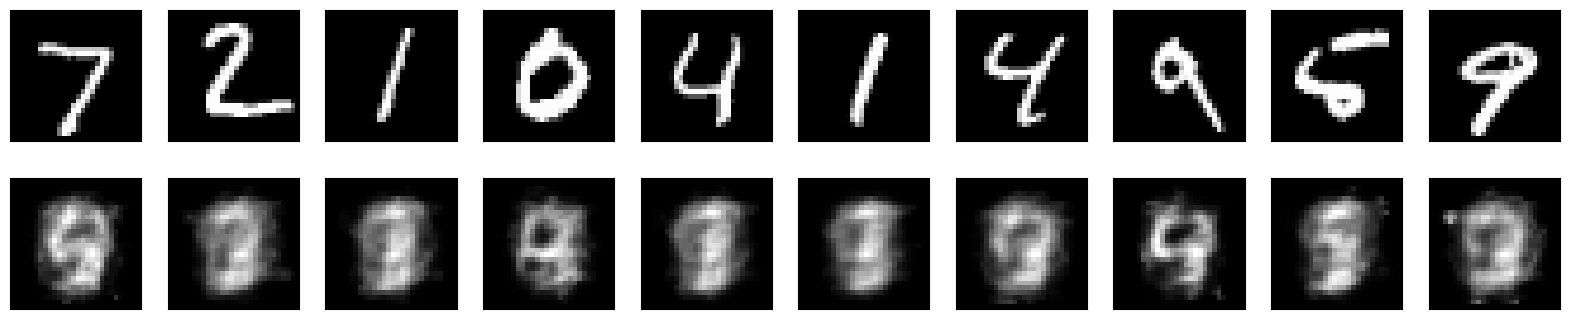

In [29]:
# 定义卷积自动编码器模型
# 创建 丢弃最后一块的 DataLoader
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=True)
    
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(128, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=2, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 128, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.squeeze(1)
        return x

# 初始化卷积自动编码器模型、损失函数和优化器
model = ConvAutoencoder()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练卷积自动编码器
num_epochs = 20
for epoch in range(num_epochs):
    for data in train_loader:
        inputs, _ = data
        #print(inputs.unsqueeze(1).shape)(128,1,784)
        outputs = model(inputs)  # 添加通道维度
        #outputs = model(inputs)

        optimizer.zero_grad()
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 使用训练好的卷积自动编码器进行编码和解码
with torch.no_grad():
    for data in test_loader:
        inputs, _ = data
        #outputs = model(inputs)
        outputs = model(inputs)  # 添加通道维度
        break

# 可视化原始图像和重建图像
n = 10  # 选择要可视化的图像数量
plt.figure(figsize=(20, 4))
for i in range(n):
    # 显示原始图像
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(inputs[i].view(28, 28).numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 显示重建图像
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(outputs[i].view(28, 28).numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()